# Lecture 5: Graphical Solution Method

In this lecture, we will discuss the graphical solution method for linear programming through a two-variable problem.

---

## Example #1

Consider a textile firm operating in Kochi. This company needs to ship 100 tons of textile goods from Kanchipuram and can rent two types of trucks: T1 and T2. Each truck of type T1 can carry 10 tons of goods and costs ₹5000 per trip, while each truck of type T2 can carry 20 tons and costs ₹8000 per trip. Thus, how many T1 and T2 type trucks should the company deploy so as to minimize the total costs?

Obective:

$$
\min_{x_1, x_2} \ Z = 5000x_1 + 8000x_2
$$

Subject to:

$$
\begin{aligned}
  & 10x_1 + 20x_2 \geq 100 \\
  & x_1, x_2 \geq 0
\end{aligned}
$$

### Iso-cost/Iso-profit curve

**Definition:** An iso-cost/iso-profit curve represents set of values for decision variables that yield the samle value for total cost/profit.

Hence, for the example problem, the iso-cost lines are given by,

$$
c = 5000x_1 + 8000x_2
$$

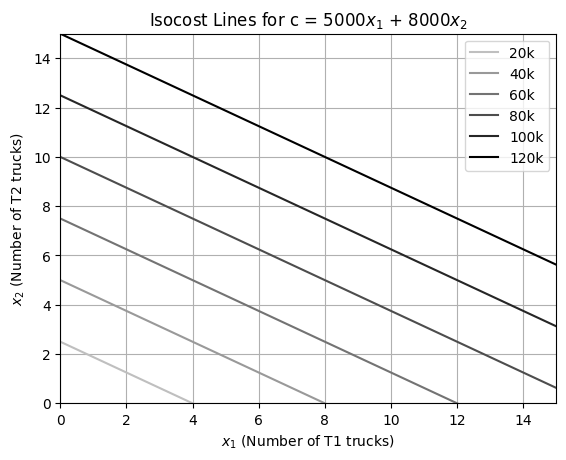

In [142]:
import numpy as np
import matplotlib.pyplot as plt

# Define objective function parameters
c1, c2 = 5000, 8000         # Parameters for the objective function c1 * x1 + c2 * x2

# Define the range of x1 values
x1 = np.linspace(0, 100, 200)

# Define set of isocost values (C)
C = [20000, 40000, 60000, 80000, 100000, 120000]  # Adjust these as needed

for i,c in enumerate(C):
  # Calculate x2 value for iscost line c1x2 + c2x2 = c
  x2 = (c - c1 * x1) / c2
  # Plot the isocost lines
  plt.plot(x1, x2, color=str(0.75-0.15*i), label=f'{c//1000}k')

# Set plot attributes
plt.xlabel(r'$x_1$ (Number of T1 trucks)')
plt.ylabel(r'$x_2$ (Number of T2 trucks)')
plt.title('Isocost Lines for c = 5000$x_1$ + 8000$x_2$')
plt.legend()
plt.grid(True)
plt.xlim(0, 15)
plt.ylim(0, 15)
plt.show()

### Feasible Region

**Definition:** The set of values of the decision variables that satisfy all given constraints constitute the feasible region. Any value within this region is thus referred to as a feasible value.

Hence, for the example problem, the feasible region is defined by,

$$
\begin{aligned}
  & 10x_1 + 20x_2 \geq 100 \\
  & x_1, x_2 \geq 0
\end{aligned}
$$

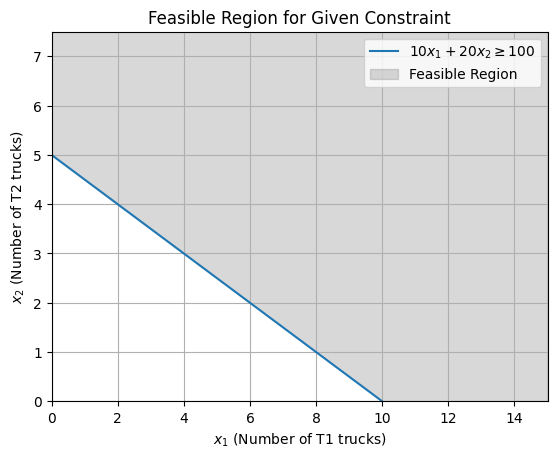

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define constraint coefficients
a11, a12, b1 = 10, 20, 100  # Coefficients for the constraint a11 * x1 + a12 * x2 >= b1

# Define the range of x1 values
x1 = np.linspace(0, b1/a11 * 1.5, 100)

# Calculate x2 values for each constraint
x2 = (b1 - a11 * x1) / a12  # From a11 * x1 + a12 * x2 >= b1

# Plot the constraints
plt.plot(x1, x2, label=rf'${a11}x_1 + {a12}x_2 \geq {b1}$')

# Fill the feasible region
plt.fill_between(x1, x2, max(x2) * 1.5, color='grey', alpha=0.3, label="Feasible Region")
                 
# Set plot attributes
plt.xlim(0, max(x1))
plt.ylim(0, 1.5 * max(x2))
plt.xlabel(r'$x_1$ (Number of T1 trucks)')
plt.ylabel(r'$x_2$ (Number of T2 trucks)')
plt.legend()
plt.title("Feasible Region for Given Constraint")
plt.grid(True)

# Display the figure
plt.show()

Considering the managerial capacity of the firm (warehouse capacity, staff numbers, etc.), the management committee has imposed an upper limit on truck rental of 20 trucks.

$$
\begin{aligned}
  & 10x_1 + 20x_2 \geq 100 \\
  & x_1 + x_2 \leq 20 \\
  & x_1, x_2 \geq 0
\end{aligned}
$$

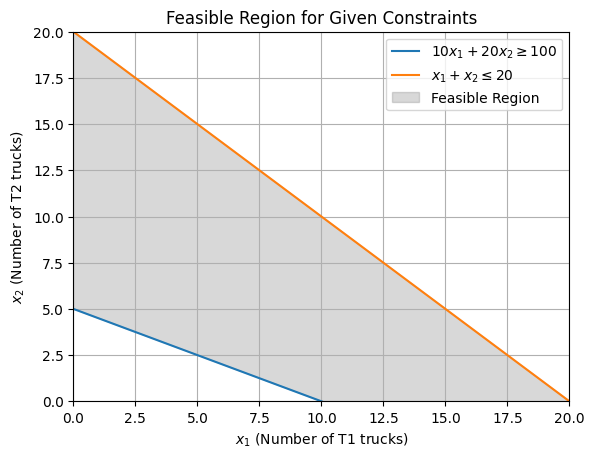

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define constraint coefficients
a11, a12, b1 = 10, 20, 100  # Coefficients for constraint a11 * x1 + a12 * x2 >= b1
a21, a22, b2 = 1, 1, 20     # Coefficients for constraint a21 * x1 + a22 * x2 <= b2

# Define the range of x1 values
x1 = np.linspace(0, max(b1/a11, b2/a21), 100)

# Calculate x2 values for each constraint
x2_1 = (b1 - a11 * x1) / a12  # From a11 * x1 + a12 * x2 >= b1
x2_2 = (b2 - a21 * x1) / a22  # From a21 * x1 + a22 * x2 <= b2

# Plot the constraints
plt.plot(x1, x2_1, label=fr'${a11}x_1 + {a12}x_2 \geq {b1}$')
plt.plot(x1, x2_2, label=fr'$x_1 + x_2 \leq {b2}$')

# Fill the feasible region where both constraints are met
plt.fill_between(x1, x2_1, x2_2, color='grey', alpha=0.3, label="Feasible Region")

# Set plot attributes
plt.xlim(0, max(b1/a11, b2/a21))
plt.ylim(0, max(b1/a12, b2/a22))
plt.xlabel(r'$x_1$ (Number of T1 trucks)')
plt.ylabel(r'$x_2$ (Number of T2 trucks)')
plt.legend()
plt.title("Feasible Region for Given Constraints")
plt.grid(True)

# Display the plot
plt.show()

Considering the managerial capacity of the firm (warehouse capacity, staff numbers, etc.), the management committee has imposed an upper limit on truck rental of 20 trucks in total, with a maximum of 12 any individual type of truck.

$$
\begin{aligned}
  & 10x_1 + 20x_2 \geq 100 \\
  & x_1 + x_2 \leq 20 \\
  & x_1 \leq 12 \\
  & x_2 \leq 12 \\
  & x_1, x_2 \geq 0
\end{aligned}
$$

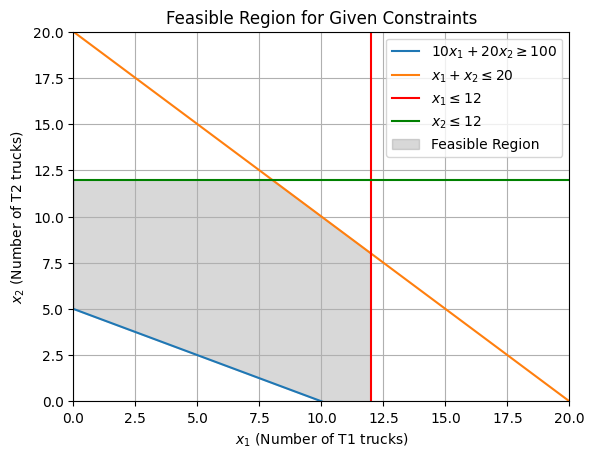

In [156]:
import numpy as np
import matplotlib.pyplot as plt

# Define constraint coefficients
a11, a12, b1 = 10, 20, 100  # Coefficients for constraint a11 * x1 + a12 * x2 >= b1
a21, a22, b2 = 1, 1, 20     # Coefficients for constraint a21 * x1 + a22 * x2 <= b2
a31, a32, b3 = 1, 0, 12     # Coefficients for constraint a31 * x1 <= b3
a41, a42, b4 = 0, 1, 12     # Coefficients for constraint a42 * x2 <= b4

# Define the range of x1 values
x1 = np.linspace(0, max(b1/a11, b2/a21, b3/a31), 400)

# Calculate x2 values for each constraint
x2_1 = (b1 - a11 * x1) / a12  # From a11 * x1 + a12 * x2 >= b1
x2_2 = (b2 - a21 * x1) / a22  # From a21 * x1 + a22 * x2 <= b2
x2_3 = np.full_like(x1, b3)   # From a31 * x1 <= b3
x2_4 = np.full_like(x1, b4)   # From a42 * x2 <= b4

# Plot the constraints
plt.plot(x1, x2_1, label=fr'${a11}x_1 + {a12}x_2 \geq {b1}$')
plt.plot(x1, x2_2, label=fr'$x_1 + x_2 \leq {b2}$')
plt.axvline(x=b3, label=fr'$x_1 \leq {b3}$', color='red')
plt.axhline(y=b4, label=fr'$x_2 \leq {b4}$', color='green')

# Fill the feasible region where all constraints are satisfied
plt.fill_between(x1, x2_1, np.minimum(x2_2,b4), where=(x1 <= b3), color='grey', alpha=0.3, label="Feasible Region")

# Set plot attributes
plt.xlim(0, max(b1/a11, b2/a21))
plt.ylim(0, max(b1/a12, b2/a22))
plt.xlabel(r'$x_1$ (Number of T1 trucks)')
plt.ylabel(r'$x_2$ (Number of T2 trucks)')
plt.title("Feasible Region for Given Constraints")
plt.legend()
plt.grid(True)

# Display th eplot
plt.show()

### Optimal Value

**Definition:** The feasible value that optimises (maximises/minimises) the objective function is called the optimal value.

Thus, for the example problem,

Objective:

$$
\min_{x_1, x_2} \ Z = 5000x_1 + 8000x_2
$$

Subject to:

$$
\begin{aligned}
  & 10x_1 + 20x_2 \geq 100 \\
  & x_1, x_2 \geq 0
\end{aligned}
$$

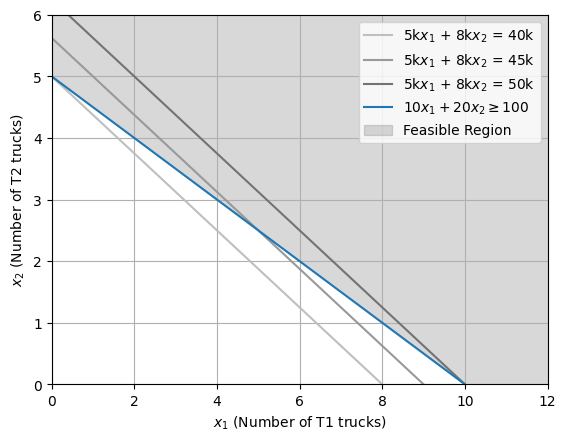

In [158]:
import numpy as np
import matplotlib.pyplot as plt

# Define objective function parameters and constraint coefficients
c1, c2 = 5000, 8000         # Parameters for the objective function c1 * x1 + c2 * x2
a11, a12, b1 = 10, 20, 100  # Coefficients for the constraint a11 * x1 + a12 * x2 >= b1

# Define the range of x1 values
x1 = np.linspace(0, b1/a11 * 1.5, 100)

# Define set of isocost values (C)
C = [40000, 45000, 50000]  # Adjust these as needed

for i,c in enumerate(C):
  # Calculate x2 value for iscost line c1x2 + c2x2 = c
  x2 = (c - 5000 * x1) / 8000
  # Plot the isocost lines
  plt.plot(x1, x2, color=str(0.75-0.15*i), label=f'{c1//1000}k$x_1$ + {c2//1000}k$x_2$ = {c//1000}k')

# Calculate x2 values for each constraint
x2 = (b1 - a11 * x1) / a12  # From a11 * x1 + a12 * x2 >= b1

# Plot the constraints
plt.plot(x1, x2, label=fr'${a11}x_1 + {a12}x_2 \geq {b1}$')

# Fill the feasible region where both constraints are met
plt.fill_between(x1, x2, 20, color='grey', alpha=0.3, label="Feasible Region")
                 
# Set plot attributes
plt.xlim(0, 12)
plt.ylim(0, 6)
plt.xlabel(r'$x_1$ (Number of T1 trucks)')
plt.ylabel(r'$x_2$ (Number of T2 trucks)')
plt.legend()
plt.grid(True)

# Display the figure
plt.show()

Notice, the solution of a linear programming problem will always lie at one of the corners of the feasible region due to proportionality property of linear problems. For the given problem, $(0,5)$ is the optimal solution, i.e., the textile firm should buy 5 T2 type trucks to ship cargo from Kanchipuram to Kochi, amounting to a total cost of ₹40k. 

Now then, for,

Objective:

$$
\min_{x_1, x_2} \ Z = 5000x_1 + 8000x_2
$$

Subject to:

$$
\begin{aligned}
  & 10x_1 + 20x_2 \geq 100 \\
  & x_1 + x_2 \leq 20 \\
  & x_1 \leq 12 \\
  & x_2 \leq 12 \\
  & x_1, x_2 \geq 0
\end{aligned}
$$

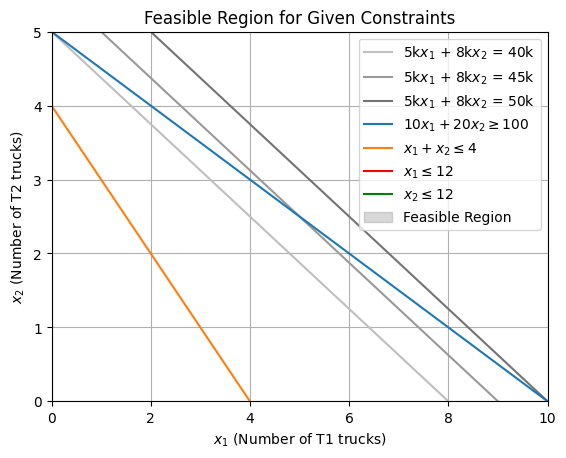

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define objective function parameters and constraint coefficients
c1, c2 = 5000, 8000         # Parameters for the objective function c1 * x1 + c2 * x2
a11, a12, b1 = 10, 20, 100  # Coefficients for constraint a11 * x1 + a12 * x2 >= b1
a21, a22, b2 = 1, 1, 20     # Coefficients for constraint a21 * x1 + a22 * x2 <= b2
a31, a32, b3 = 1, 0, 12     # Coefficients for constraint a31 * x1 <= b3
a41, a42, b4 = 0, 1, 12     # Coefficients for constraint a42 * x2 <= b4

# Define the range of x1 values
x1 = np.linspace(0, max(b1/a11, b2/a21, b3/a31), 400)

# Define set of isocost values (C)
C = [40000, 45000, 50000]  # Adjust these as needed

for i,c in enumerate(C):
  # Calculate x2 value for isocost line c1x2 + c2x2 = c
  x2 = (c - 5000 * x1) / 8000
  # Plot the isocost lines
  plt.plot(x1, x2, color=str(0.75-0.15*i), label=f'{c1//1000}k$x_1$ + {c2//1000}k$x_2$ = {c//1000}k')

# Calculate x2 values for each constraint
x2_1 = (b1 - a11 * x1) / a12  # From a11 * x1 + a12 * x2 >= b1
x2_2 = (b2 - a21 * x1) / a22  # From a21 * x1 + a22 * x2 <= b2
x2_3 = np.full_like(x1, b3)   # From a31 * x1 <= b3
x2_4 = np.full_like(x1, b4)   # From a42 * x2 <= b4

# Plot the constraints
plt.plot(x1, x2_1, label=fr'${a11}x_1 + {a12}x_2 \geq {b1}$')
plt.plot(x1, x2_2, label=fr'$x_1 + x_2 \leq {b2}$')
plt.axvline(x=b3, label=fr'$x_1 \leq {b3}$', color='red')
plt.axhline(y=b4, label=fr'$x_2 \leq {b4}$', color='green')

# Fill the feasible region where all constraints are satisfied
plt.fill_between(x1, np.minimum(x2_1, b4), np.minimum(x2_2,b4), where=(x1 <= b3) & (x2_2 >= x2_1), color='grey', alpha=0.3, label="Feasible Region")

# Set plot attributes
plt.xlim(0, max(b1/a11, b2/a21))
plt.ylim(0, max(b1/a12, b2/a22))
plt.xlabel(r'$x_1$ (Number of T1 trucks)')
plt.ylabel(r'$x_2$ (Number of T2 trucks)')
plt.title("Feasible Region for Given Constraints")
plt.legend()
plt.grid(True)

# Display th eplot
plt.show()

Here again, for the given problem, $(0,5)$ is the optimal solution, i.e., the textile firm should buy 5 T2 type trucks to ship cargo from Kanchipuram to Kochi, amounting to a total cost of ₹40k. Notice that for this problem, $10x_1 + 20x_2 \geq 100$ (and $x_1 \geq 0$) define the solution, and thus are the binding constraints, while none of the other constraints shape the solution, and hence are non-binding constraints. To be precise,

**Definition:** A binding constraint is one that directly affects the optimal solution. At the optimal point, the constraint equation is exactly satisfied (meaning it "binds" or restricts the solution to that specific boundary). If this constraint were removed or relaxed, the optimal solution would change. On the other hand, a non-binding constraint is one that does not limit or affect the optimal solution. If this constraint were removed, the optimal solution would remain the same.

Now then, what if instead of a maximum of 12 T2 trucks, the manegerial committee had imposed a thershold of 4 trucks.

Objective:

$$
\min_{x_1, x_2} \ Z = 5000x_1 + 8000x_2
$$

Subject to:

$$
\begin{aligned}
  & 10x_1 + 20x_2 \geq 100 \\
  & x_1 + x_2 \leq 20 \\
  & x_1 \leq 12 \\
  & x_2 \leq 4 \\
  & x_1, x_2 \geq 0
\end{aligned}
$$


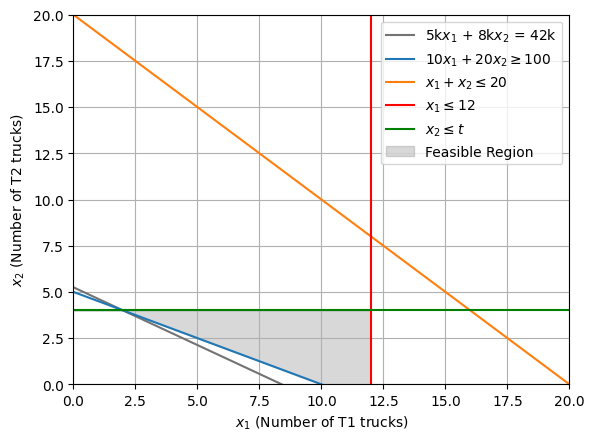

In [224]:
import numpy as np
import matplotlib.pyplot as plt

# Define objective function parameters and constraint coefficients
c1, c2 = 5000, 8000         # Parameters for the objective function c1 * x1 + c2 * x2
a11, a12, b1 = 10, 20, 100  # Coefficients for constraint a11 * x1 + a12 * x2 >= b1
a21, a22, b2 = 1, 1, 20     # Coefficients for constraint a21 * x1 + a22 * x2 <= b2
a31, a32, b3 = 1, 0, 12     # Coefficients for constraint a31 * x1 <= b3
a41, a42, b4 = 0, 1, 4      # Coefficients for constraint a42 * x2 <= b4

# Define the range of x1 values
x1 = np.linspace(0, max(b1/a11, b2/a21, b3/a31), 400)

# Fetch the optimal isocost line
c = c1 * (10 - 2 * b4) + c2 * b4
# Calculate x2 value for iscost line c1x2 + c2x2 = c
x2 = (c - 5000 * x1) / 8000
plt.plot(x1, x2, color=str(0.75-0.15*i), label=f'{c1//1000}k$x_1$ + {c2//1000}k$x_2$ = {c//1000}k')

# Calculate x2 values for each constraint
x2_1 = (b1 - a11 * x1) / a12  # From a11 * x1 + a12 * x2 >= b1
x2_2 = (b2 - a21 * x1) / a22  # From a21 * x1 + a22 * x2 <= b2
x2_3 = np.full_like(x1, b3)   # From a31 * x1 <= b3
x2_4 = np.full_like(x1, b4)   # From a42 * x2 <= b4

# Plot the constraints
plt.plot(x1, x2_1, label=fr'${a11}x_1 + {a12}x_2 \geq {b1}$')
plt.plot(x1, x2_2, label=fr'$x_1 + x_2 \leq {b2}$')
plt.axvline(x=b3, label=fr'$x_1 \leq {b3}$', color='red')
plt.axhline(y=b4, label=fr'$x_2 \leq t$', color='green')

# Fill the feasible region where all constraints are satisfied
plt.fill_between(x1, np.minimum(x2_1, b4), np.minimum(x2_2, b4), where=(x1 <= b3) & (x2_2 >= x2_1), color='grey', alpha=0.3, label="Feasible Region")

# Set plot attributes
plt.xlim(0, max(b1/a11, b2/a21))
plt.ylim(0, max(b1/a12, b2/a22))
plt.xlabel(r'$x_1$ (Number of T1 trucks)')
plt.ylabel(r'$x_2$ (Number of T2 trucks)')
plt.legend()
plt.grid(True)
plt.show()

Here, for the given problem, $(2,4)$ is the optimal solution, i.e., the textile firm should buy 2 T2 type trucks and 4 T2 type trucks to ship cargo from Kanchipuram to Kochi, amounting to a total cost of ₹42k. Notice that for this problem, $10x_1 + 20x_2 \geq 100$ and $x_2 \geq 4$ define the solution, and thus are the binding constraints, while $x_1 + x_2 \leq 20$ and $x_1 \geq 12$ do not shape the solution, and hence are non-binding constraints.

Note, while all the three feasible regions are valid for the constraints we have developed, in real-world applications number of T1 trucks and number of T2 trucks need to be integer. Hence, instead of $x_1, x_2 \geq 0$, we must have $x_1,x_2 \in \mathbb{Z}_+$. Consequently, the feasible region will only include integer points for the decision variable. Further, for a general $n$-dimensional problem, i.e., for a problem with $n$ decision variables, we will have an $n$ dimensional feasible region. And therefore, for an $n$-dimensional problem, the graphical solution is not a viable alternative.